

# Projeto 3 - Ciência dos dados 

###### Nomes: Gustavo, Matheus, Pedro Carani e Thiago David

# Modelo preditivo do indíce Ibovespa baseado no próprio indíce.




## Bibliografia:

    - Montgomery. Cap 11, pág 333.
    -https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score
    -https://scikit-learn.org/stable/modules/model_evaluation.html

## Regressão Linear


 
A regressão linear é um método de ajuste de reta dos dados que estão sendo considerados, e pode ser calculado de acordo com a seguinte fórmula: $y_i=\beta_0+\beta_1x_i+\epsilon_i$. Também, ajuda na procura por padrões e anomalias desses dados.  Primeiro, para fazer uma regressão linear, é necessário achar os coeficientes $\beta_0$ e $\beta_1$.

Para achar o $\beta_0$ nós usamos a seguinte fórmula:

$$\beta_0=\bar{y}-\beta_1\bar{x}$$

E para achar o $\beta_1$ usamos a seguinte fórmula: $$\beta_1=\frac{S_{XY}}{S_{XX}}=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$$

Após achar os coeficientes é necessário achar o vetor de resíduos através da fórmula: $\epsilon_i=y_i-(\beta_0+\beta_1x_i)$. Com os coeficientes e o vetor de resíduo já é possível a reta da regressão linear.
    

## Sobre o nosso Modelo:


 ### Os dados foram coletados do site https://finance.yahoo.com/:

     - Ibovespa (2018-2019)
     
     
     
     
   

## Qual variável explicativa vai ser utilizada?

#### A variável explicativa a ser utilzada no modelo será o valor do índice ibovespa anterior.

## Nosso modelo:

## Importando bibliotecas: 

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from scipy.stats import norm 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import seaborn as sns


## Lendo os arquivos de dados:

In [15]:
ibov=pd.read_csv("bov.csv")


# Análise exploratória dos dados:

## Dados do Ibovespa

In [16]:
ibov.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-08,87719.0,88570.0,85620.0,85620.0,85620.0,5297700
1,2018-11-09,85620.0,86233.0,84030.0,85641.0,85641.0,4814400
2,2018-11-12,85644.0,86227.0,85009.0,85525.0,85525.0,3534000
3,2018-11-13,85531.0,85941.0,84071.0,84914.0,84914.0,4410700
4,2018-11-14,84898.0,85973.0,84267.0,85973.0,85973.0,5591600


## Vamos analisar apenas os dados de fechamento

In [17]:
ibov["Close"]

0       85620.000000
1       85641.000000
2       85525.000000
3       84914.000000
4       85973.000000
           ...      
244    108601.000000
245    108451.000000
246    108336.000000
247    109581.000000
248    108884.710938
Name: Close, Length: 249, dtype: float64

## Criando um novo Dataset com apenas as informações necessárias (fechamento) para a análise:

In [18]:
ibov=pd.DataFrame(ibov, columns=['Date','Close'])


## Dataset do Ibovespa para o modelo:

In [19]:
ibov.head()

,Date,Close
0,2018-11-08,85620.0
1,2018-11-09,85641.0
2,2018-11-12,85525.0
3,2018-11-13,84914.0
4,2018-11-14,85973.0


## Separando os dados:

In [22]:
date=ibov['Date']
pontos=ibov['Close']


## Boxplot do índice Ibovespa


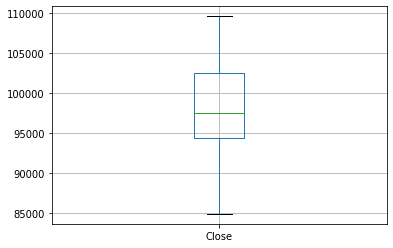

In [24]:
ibov.boxplot();


## Histograma do Ibovespa

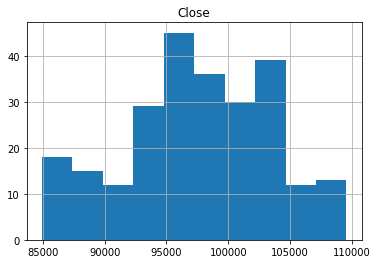

In [25]:
ibov.hist();

## Gráfico do Ibovespa durante os anos de 2018 e 2019.

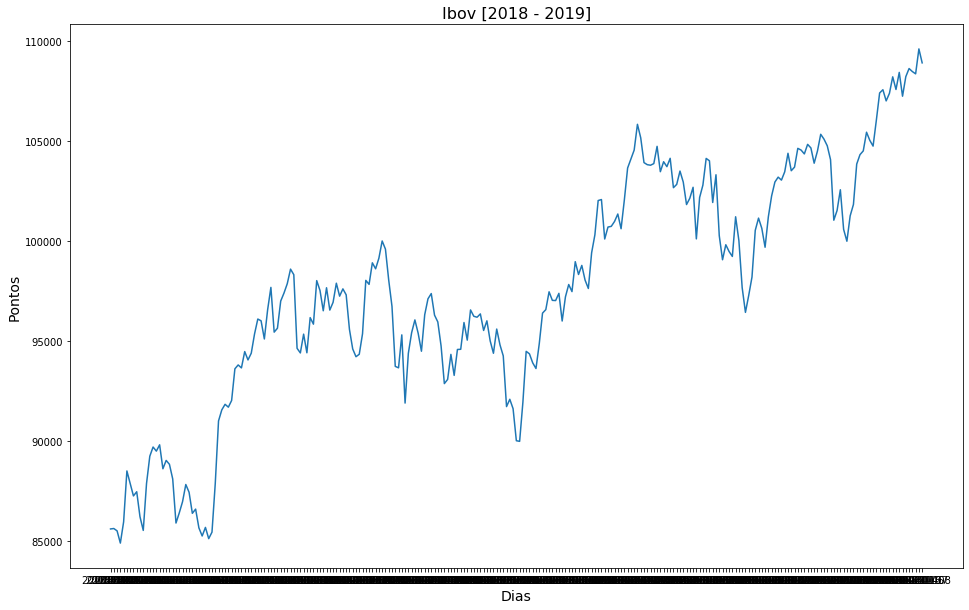

In [27]:
plt.figure(1, figsize=(16,10))
plt.plot(date, pontos)
plt.title('Ibov [2018 - 2019]', fontsize=16)
plt.xlabel('Dias', fontsize=14)
plt.ylabel('Pontos', fontsize=14)
plt.show();



## Modelo: 

### Separar dados para treinamento e teste

In [30]:
train, test = train_test_split(ibov, test_size=0.20)

In [31]:
train

,Date,Close
180,2019-08-06,102164.0
47,2019-01-22,95103.0
233,2019-10-18,104729.0
228,2019-10-11,103832.0
226,2019-10-09,101249.0
...,...,...
186,2019-08-14,100258.0
80,2019-03-13,98904.0
162,2019-07-11,105146.0
229,2019-10-14,104302.0


In [33]:
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

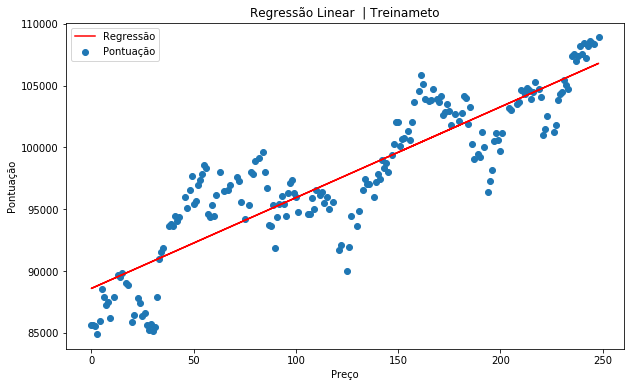

In [35]:
plt.figure(1, figsize=(10,6))
plt.title('Regressão Linear  | Treinameto' )
plt.scatter(X_train, y_train, label='Pontuação')
plt.plot(X_train, y_pred, color='r', label='Regressão')
plt.xlabel('Preço')
plt.ylabel('Pontuação')
plt.legend()
plt.show()

In [35]:
X_test = np.array(train.index).reshape(-1, 1)
y_test = test['Adj Close']
y_pred = model.predict(X_test)

ValueError: x and y must be the same size

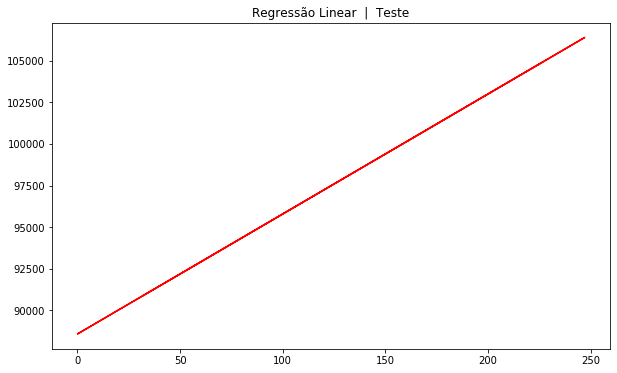

ValueError: Found input variables with inconsistent numbers of samples: [50, 199]

In [ ]:
## ANALISES DE RESIDUOS MAIS EQUACAO DA RETA

# Análise de resíduos 